# Quarentena de dados

## Aula 2: Médias, medianas e visualização de dados.



In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')


Bad key "text.kerning_factor" on line 4 in
C:\Users\guilh\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [113]:
filmes = pd.read_csv('datasets/movies.csv')
avaliacoes = pd.read_csv('datasets/ratings.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [3]:
generos = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

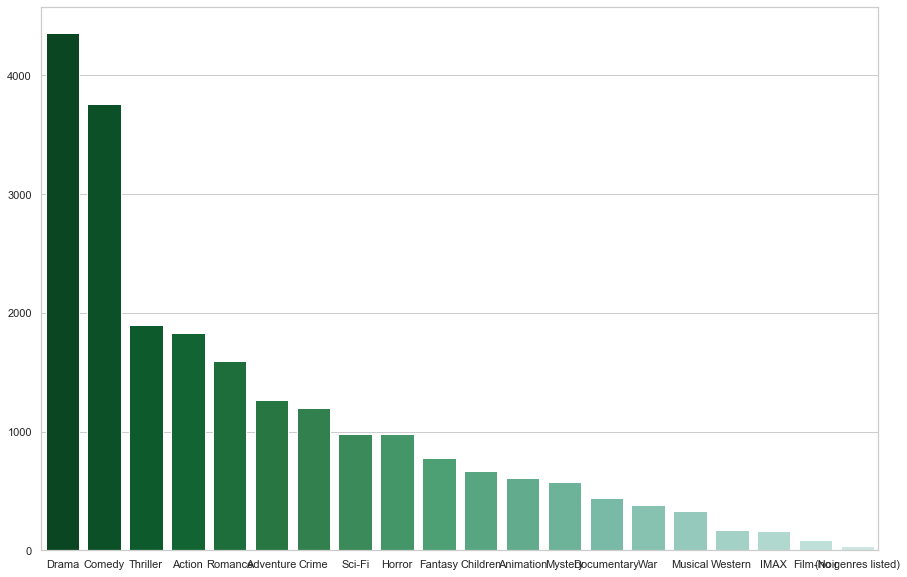

In [46]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.barplot(x=generos.index, y=generos.values, palette=sns.color_palette("BuGn_r", n_colors=len(generos)+6))
plt.show()

In [5]:
def notasFilme(i):
    notasDoFilme = avaliacoes[avaliacoes['filmeId'] == i]['nota']
    sns.boxplot(y=notasDoFilme)
    plt.show()
    plt.hist(notasDoFilme)
    plt.show()
    return notasDoFilme.describe()

In [6]:
type(avaliacoes[avaliacoes['filmeId'] == 50]['nota'])

pandas.core.series.Series

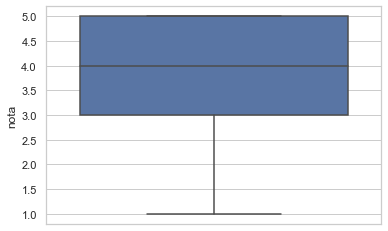

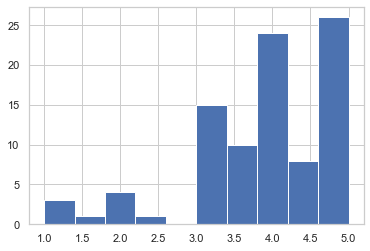

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [7]:
notasFilme(919)

In [51]:
def plot_filme(n):
  notas_do_filme = avaliacoes[avaliacoes['filmeId'] == n]['nota']
  sns.boxplot(data=notas_do_filme)
  plt.show()
  return

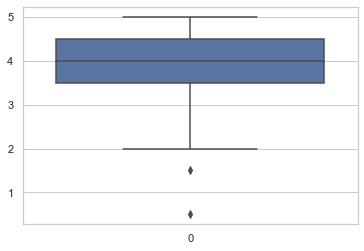

In [49]:
notas_do_filme = avaliacoes[avaliacoes['filmeId'] == 1]['nota']
sns.boxplot(data=notas_do_filme)
plt.show()

In [94]:
avaliacoes[avaliacoes['filmeId'] == 480]['nota'].quantile(0.75)

4.0

## Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

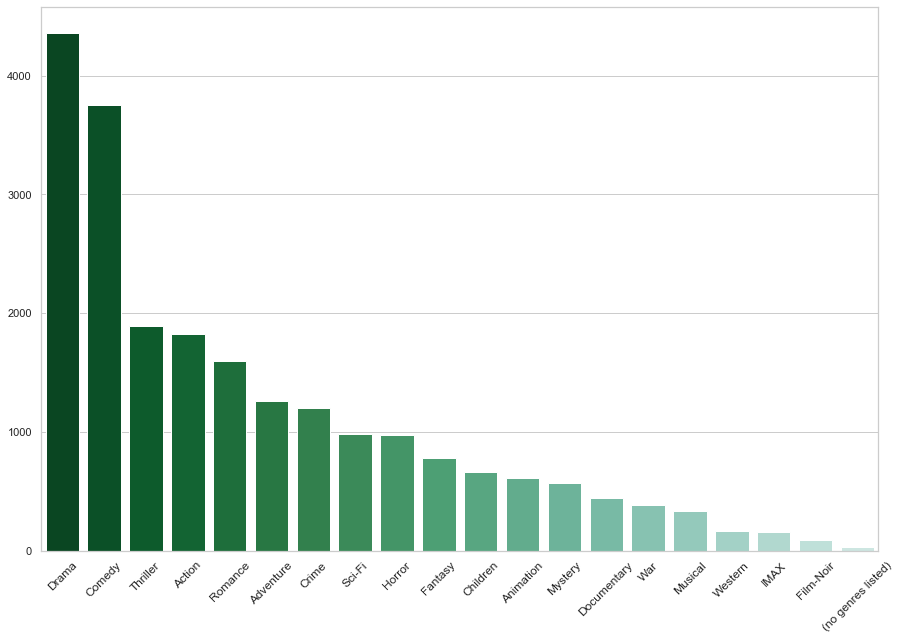

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x=generos.index, y=generos.values, palette=sns.color_palette("BuGn_r", n_colors=len(generos)+6))
plt.xticks(rotation=45, ha='center', fontsize=12)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [9]:
avaliacoes

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [29]:
nVotos = avaliacoes.groupby('filmeId').count()['nota'].sort_values(ascending=False)

In [59]:
maisVotados = nVotos.head(10).index.to_list()
maisVotados

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]

In [71]:
filmesMaisVotados = avaliacoes.query('filmeId in @maisVotados')

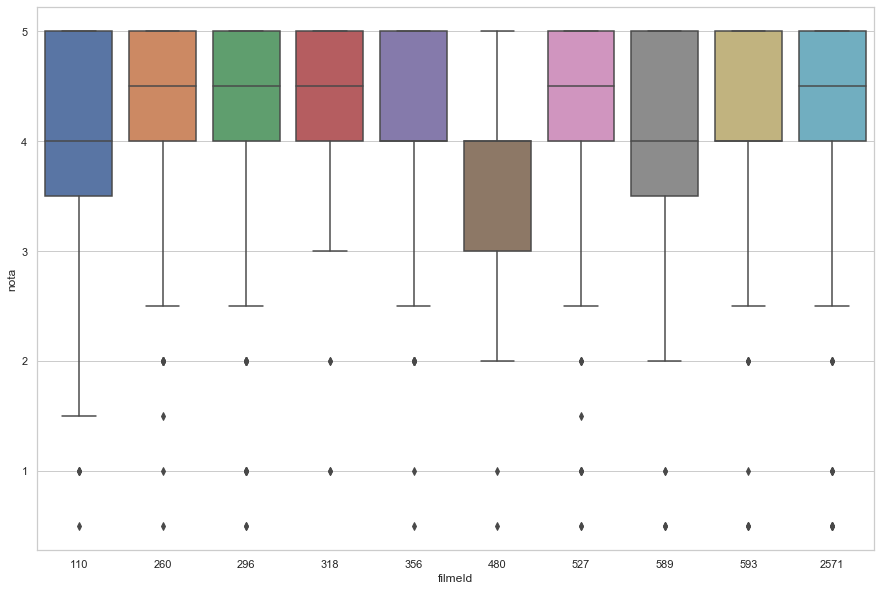

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(x='filmeId' ,y='nota', data=filmesMaisVotados)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

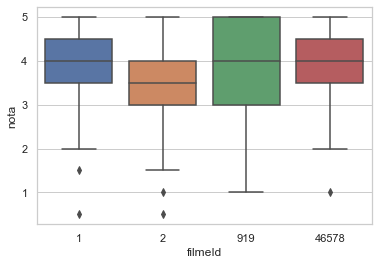

In [126]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")
plt.show()

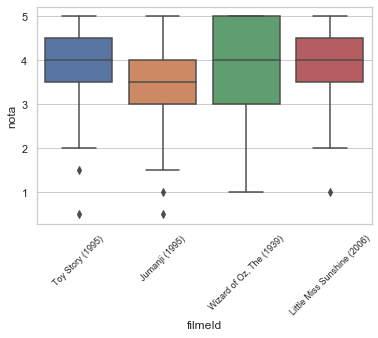

In [125]:
plot = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")
plt.xticks(ticks=plot.get_xticks(), labels=(filmes.query('filmeId in [1,2,919,46578]')['titulo'].values), rotation=45, fontsize=9)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


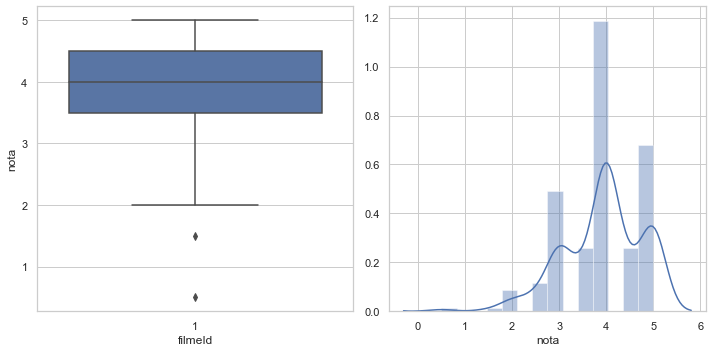

In [149]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=avaliacoes[avaliacoes['filmeId'] == 1], y='nota', x='filmeId')
plt.subplot(1, 2, 2)
sns.distplot(avaliacoes[avaliacoes['filmeId'] == 1]['nota'])
plt.tight_layout()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).